# determinant

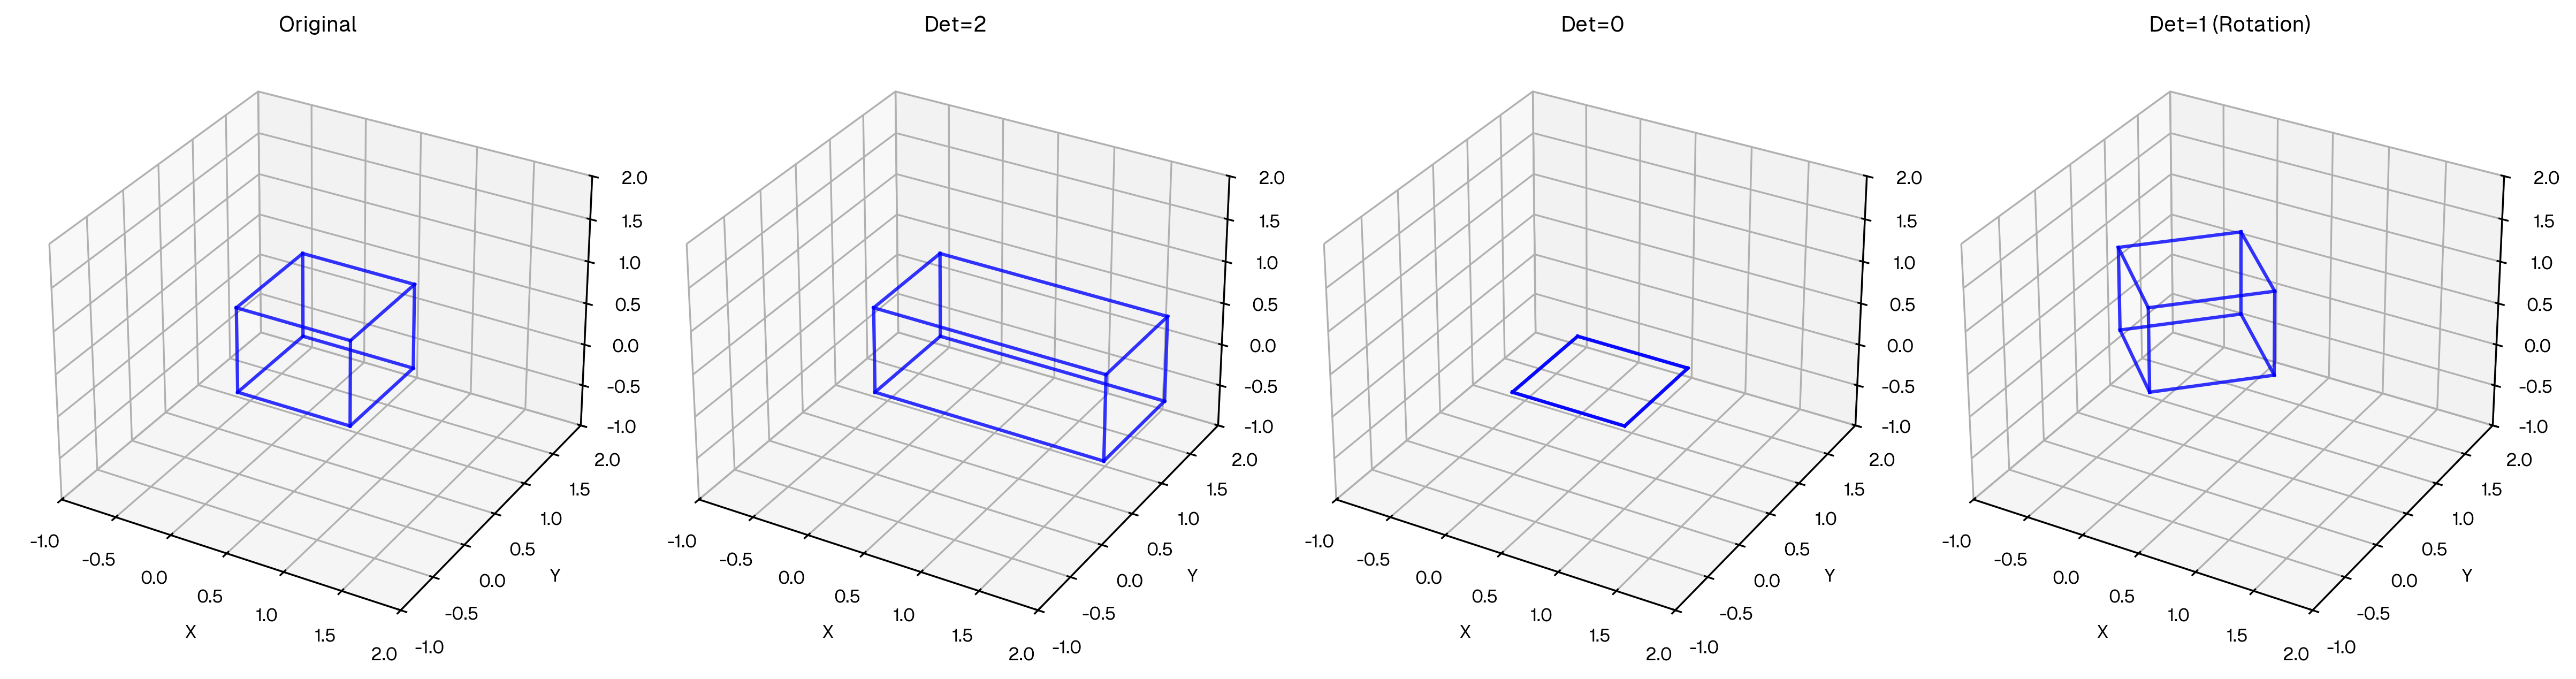

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义单位立方体的顶点和边
vertices = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
])
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # 底面
    (4, 5), (5, 6), (6, 7), (7, 4),  # 顶面
    (0, 4), (1, 5), (2, 6), (3, 7)   # 连接边
]

# 定义变换矩阵
A = np.diag([2, 1, 1])          # 行列式=2，沿x轴拉伸2倍
B = np.diag([1, 1, 0])          # 行列式=0，压缩到xy平面
theta = np.pi/4                 # 45度旋转
C = np.array([                   # 行列式=1的旋转矩阵
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# 应用变换
transformed = {
    'Original': vertices,
    'Det=2': vertices @ A.T,
    'Det=0': vertices @ B.T,
    'Det=1 (Rotation)': vertices @ C.T
}

# 绘制函数


def plot_cube(ax, points, title):
    for edge in edges:
        x, y, z = points[list(edge)].T
        ax.plot(x, y, z, color='blue', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-1, 2])
    ax.set_ylim([-1, 2])
    ax.set_zlim([-1, 2])


# 创建子图
fig = plt.figure(figsize=(16, 4))
for i, (title, pts) in enumerate(transformed.items(), 1):
    ax = fig.add_subplot(1, 4, i, projection='3d')
    plot_cube(ax, pts, title)

plt.tight_layout()
plt.show()

## bayesian

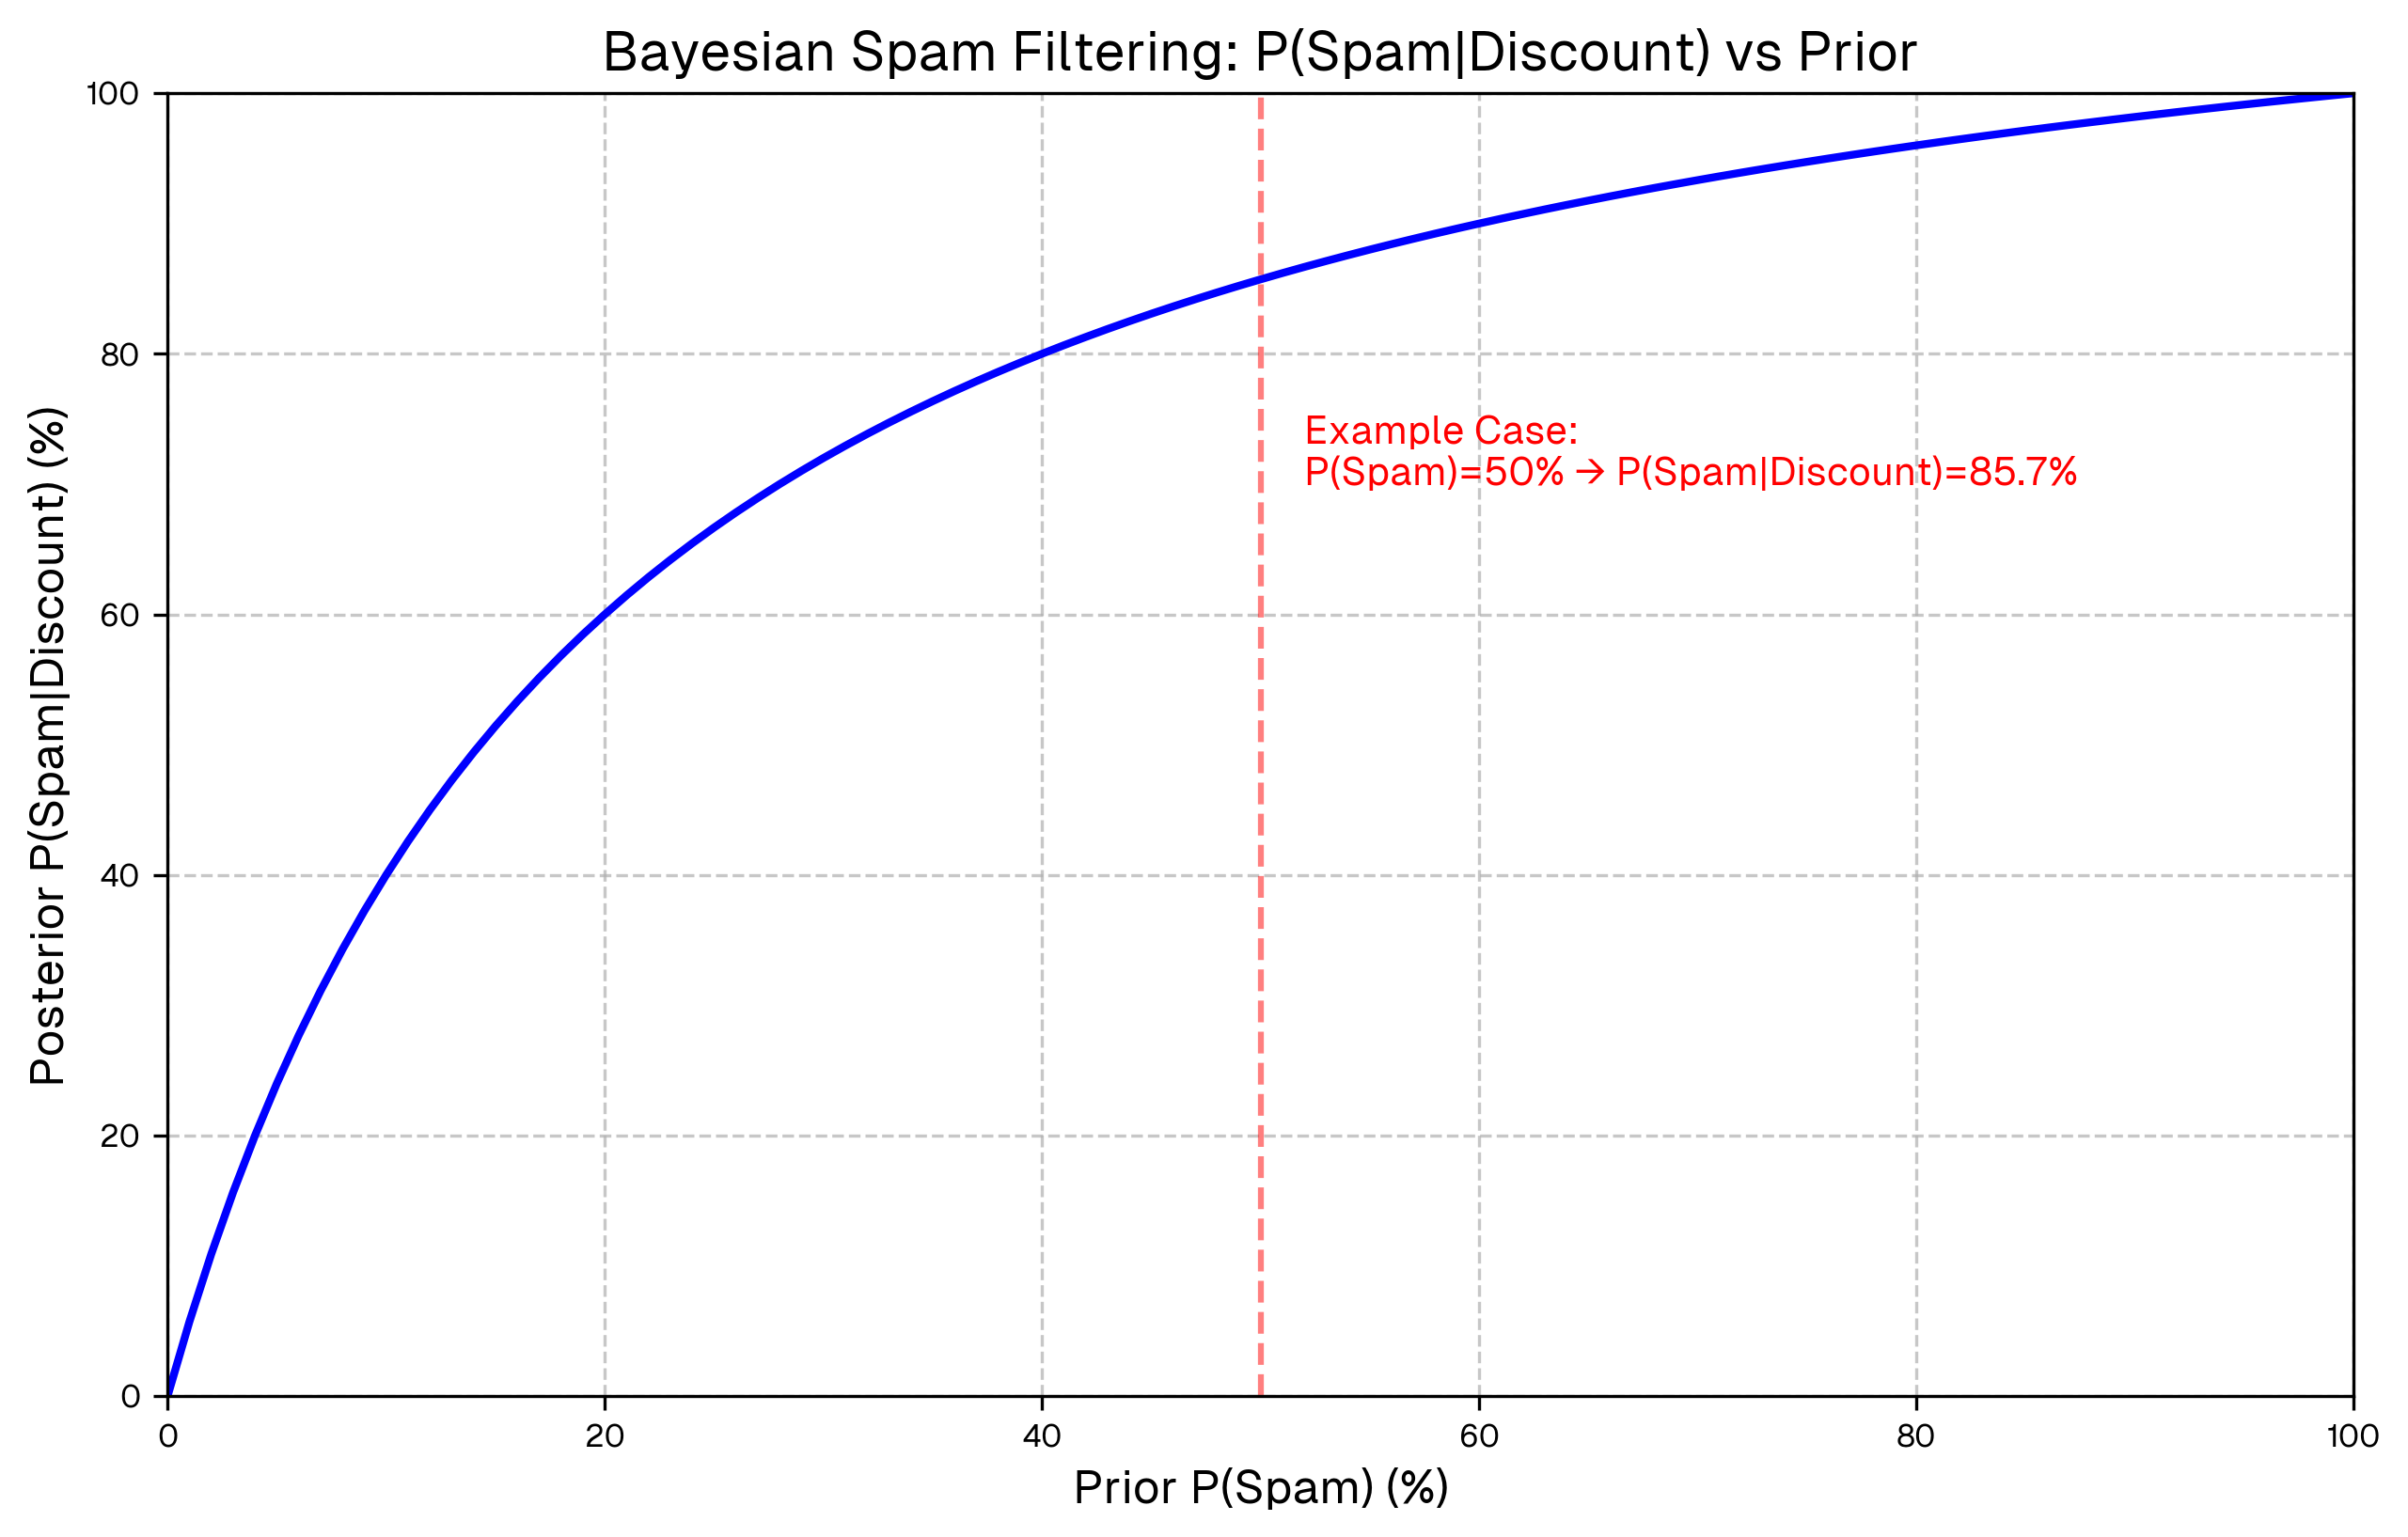

In [17]:
P_discount_spam = 0.3    # P(折扣|垃圾)
P_discount_ham = 0.05    # P(折扣|正常)

# 生成 P(垃圾) 的数组（从 0 到 1，步长 0.01）
P_spam = np.arange(0, 1.01, 0.01)

# 计算贝叶斯后验概率 P(垃圾|折扣)
P_spam_given_discount = (P_discount_spam * P_spam) / \
    (P_discount_spam * P_spam + P_discount_ham * (1 - P_spam))

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(P_spam * 100, P_spam_given_discount * 100, 'b-', linewidth=2)
plt.title("Bayesian Spam Filtering: P(Spam|Discount) vs Prior", fontsize=14)
plt.xlabel("Prior P(Spam) (%)", fontsize=12)
plt.ylabel("Posterior P(Spam|Discount) (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axvline(50, color='red', linestyle='--', alpha=0.5)
plt.text(52, 70, 'Example Case:\nP(Spam)=50% → P(Spam|Discount)=85.7%',
         color='red', fontsize=10)
plt.show()

# softmax & temperature

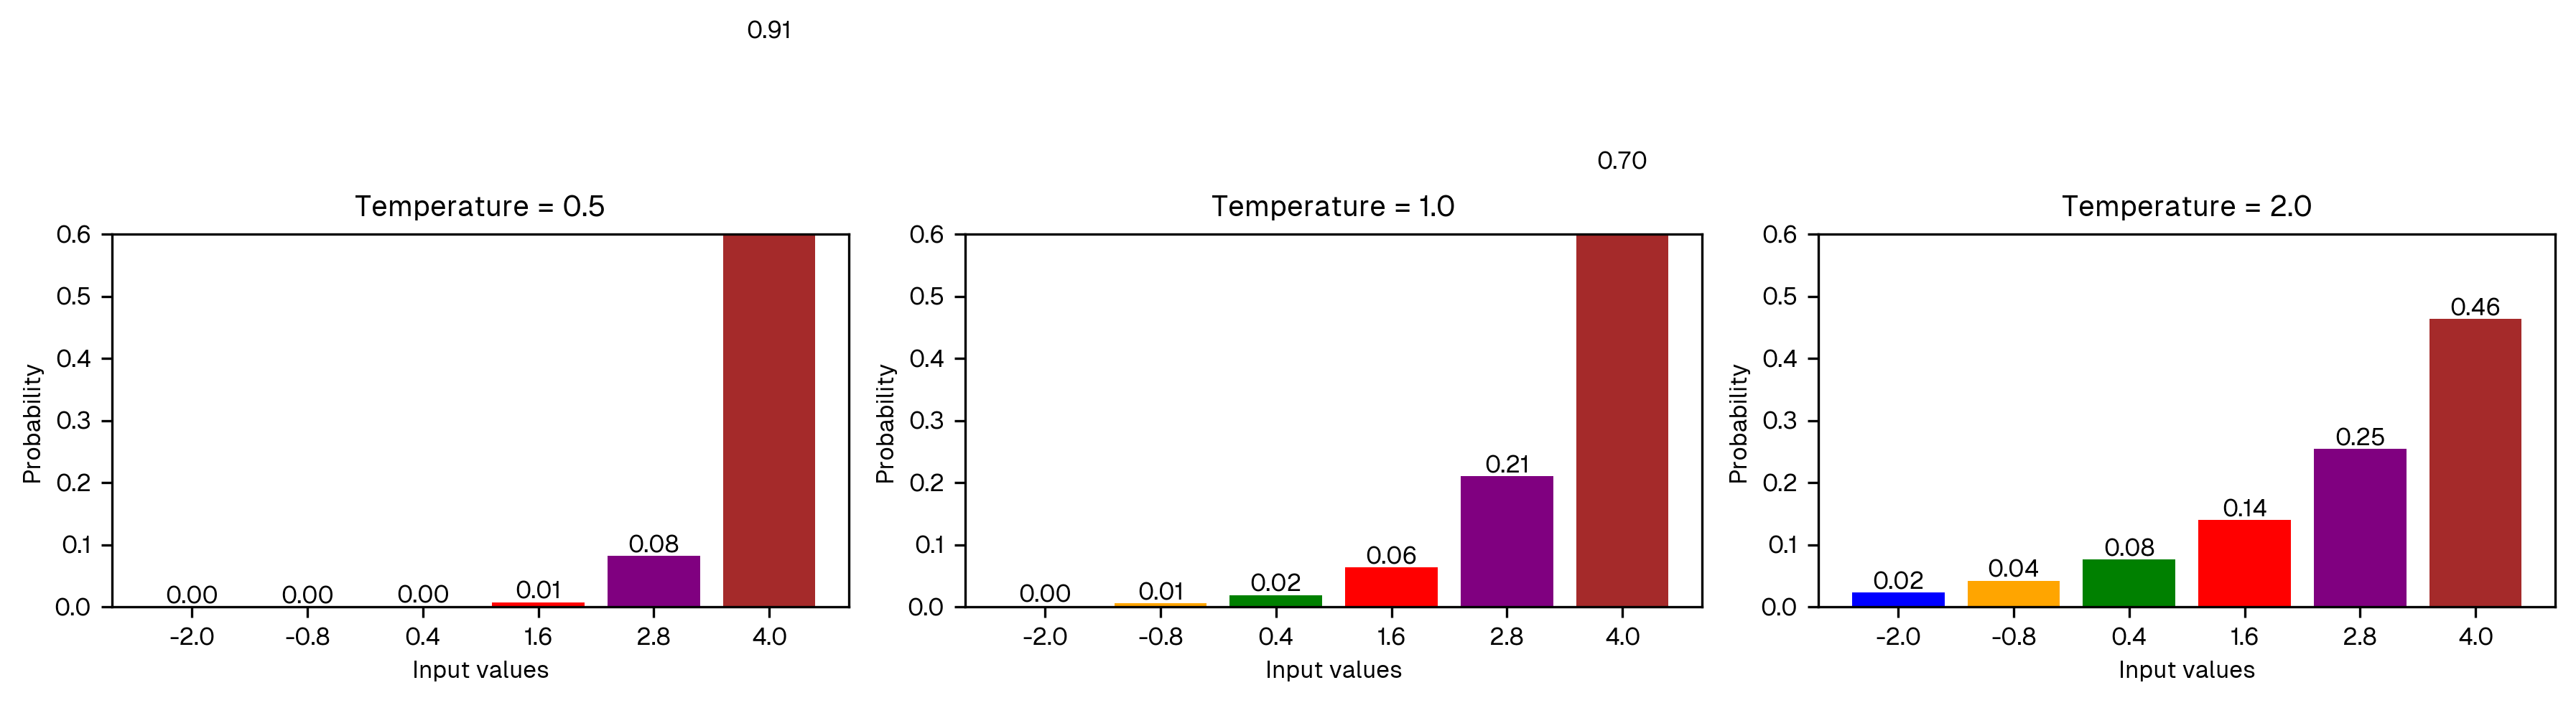

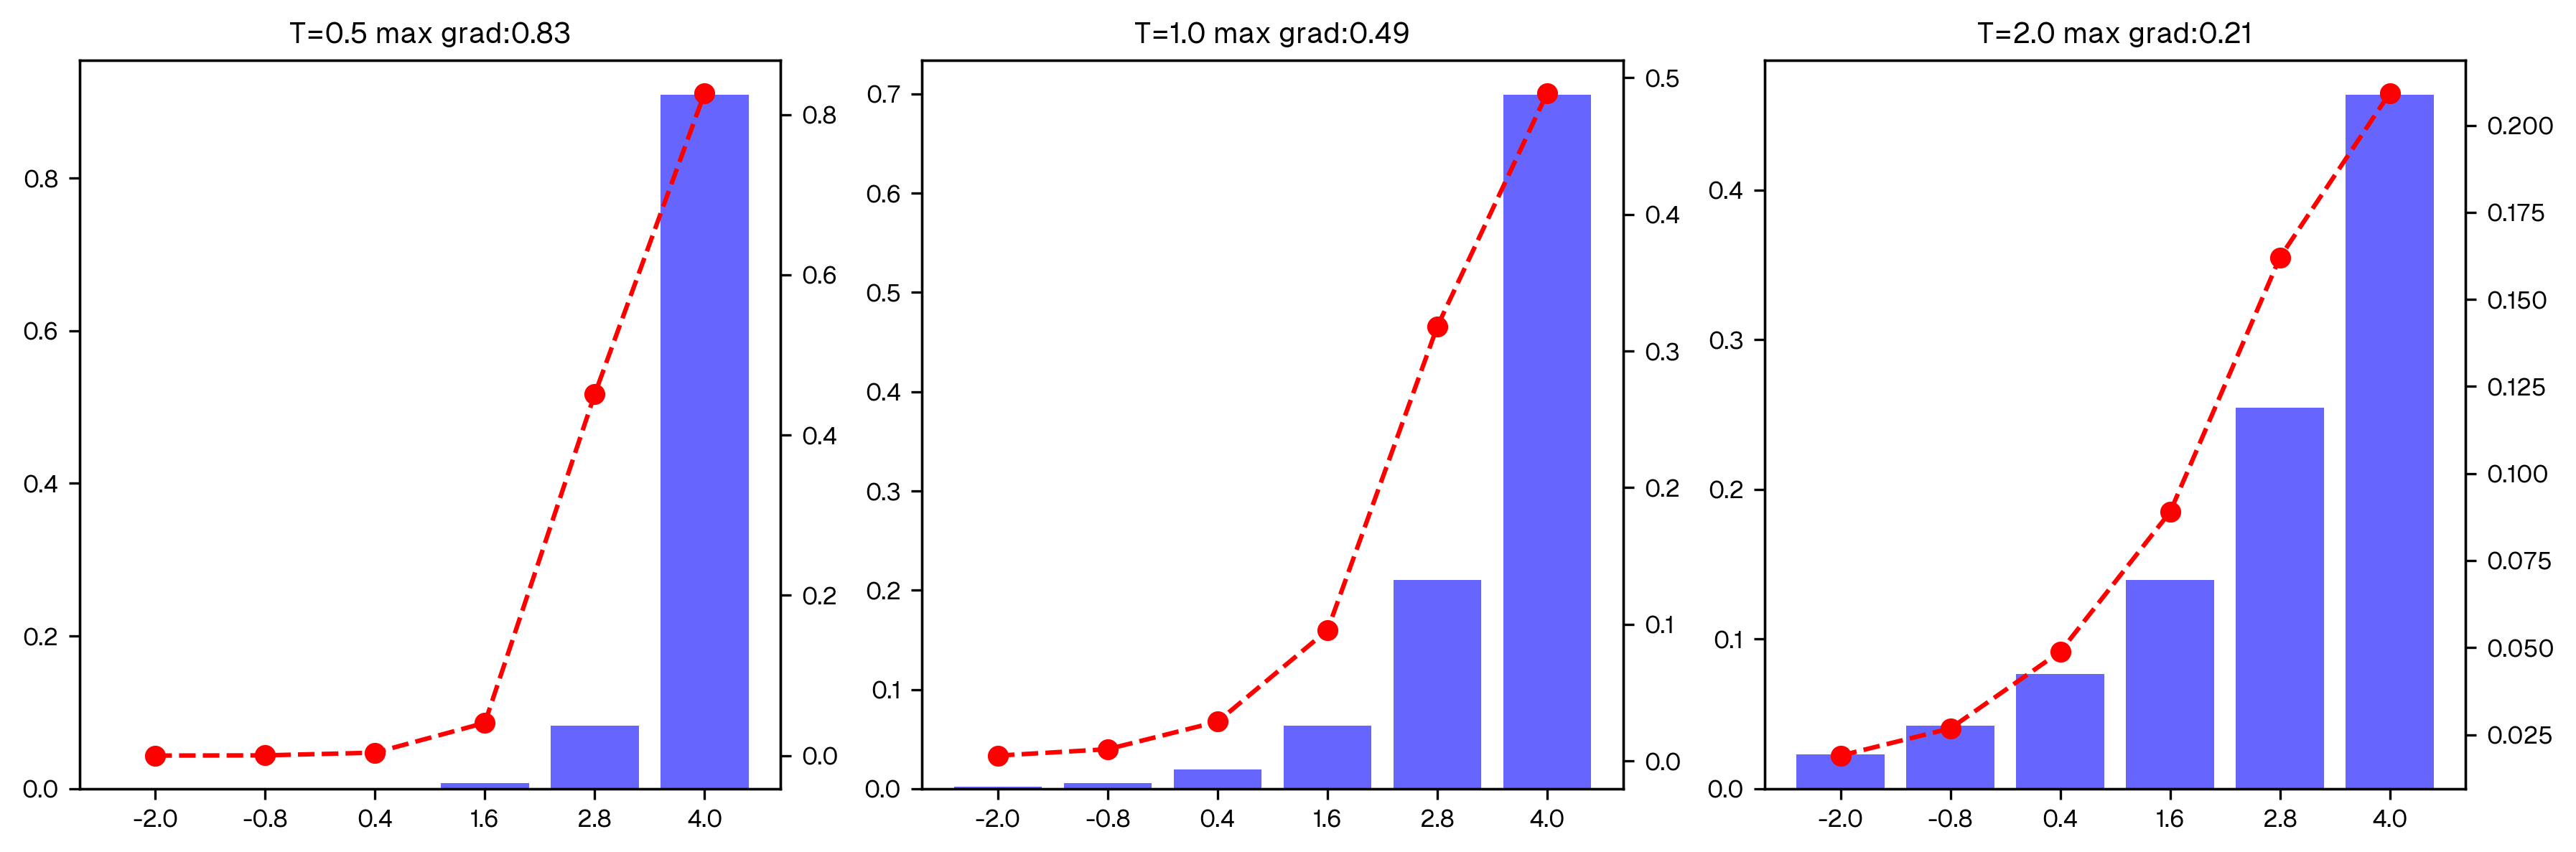

In [13]:
# 生成测试数据
x = np.linspace(-2, 4, 6)  # 创建6个线性间隔的测试点
temperatures = [0.5, 1.0, 2.0]  # 不同温度参数

# 定义softmax函数


def softmax(x, temperature=1.0):
    e_x = np.exp((x - np.max(x)) / temperature)  # 数值稳定处理
    return e_x / e_x.sum()


plt.figure(figsize=(12, 4))

# 绘制不同temperature下的softmax效果
for i, t in enumerate(temperatures):
    plt.subplot(1, 3, i+1)
    probs = softmax(x, temperature=t)

    # 绘制柱状图
    bars = plt.bar(range(len(x)), probs, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

    # 添加数值标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')

    plt.xticks(range(len(x)), [f'{val:.1f}' for val in x])
    plt.title(f'Temperature = {t}')
    plt.xlabel('Input values')
    plt.ylabel('Probability')
    plt.ylim(0, 0.6)

plt.tight_layout()
plt.show()

# 新增梯度可视化
plt.figure(figsize=(12, 4))
for i, t in enumerate(temperatures):
    plt.subplot(1, 3, i+1)

    # 计算概率梯度
    probs = softmax(x, temperature=t)
    gradients = np.gradient(probs)

    # 绘制双轴图表
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    ax1.bar(range(len(x)), probs, alpha=0.6, color='blue')
    ax2.plot(gradients, 'r--', marker='o', label='prob grad')

    plt.title(f'T={t} max grad:{max(abs(gradients)):.2f}')
    plt.xticks(range(len(x)), [f'{val:.1f}' for val in x])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设一个 6x6 的注意力权重矩阵
attention_weights = np.array([
    [0.1, 0.2, 0.4, 0.1, 0.1, 0.1],
    [0.2, 0.3, 0.1, 0.2, 0.1, 0.1],
    [0.1, 0.2, 0.5, 0.1, 0.1, 0.0],
    [0.3, 0.1, 0.2, 0.3, 0.0, 0.1],
    [0.0, 0.1, 0.1, 0.1, 0.6, 0.1],
    [0.2, 0.1, 0.2, 0.1, 0.1, 0.3]
])

print(attention_weights.shape)

fig, ax = plt.subplots()
cax = ax.matshow(attention_weights, cmap='Blues')

# 添加颜色条
fig.colorbar(cax)

# 设置刻度
ax.set_xticks(range(6))
ax.set_yticks(range(6))
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F'])
ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F'])

plt.show()

(6, 6)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1200x800 with 0 Axes>